In [84]:
import tensorflow as tf
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to binary classification
train_images_binary = np.zeros_like(train_images)
test_images_binary = np.zeros_like(test_images)

# Apply binary thresholding to each image
threshold = 0.5
train_images_binary[train_images > threshold] = 1
test_images_binary[test_images > threshold] = 1

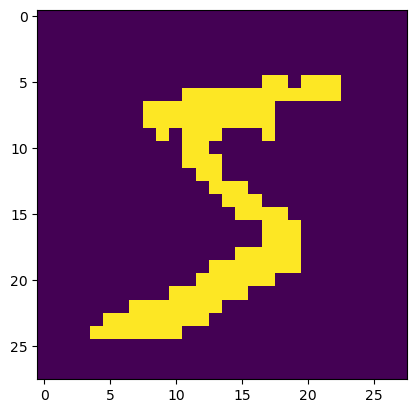

In [85]:
import matplotlib.pyplot as plt

plt.imshow(train_images_binary[0])

In [86]:
train_images_binary[0, 8]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [87]:
train_images_flat = train_images_binary.reshape(train_images.shape[0], -1)
test_images_flat = test_images_binary.reshape(test_images.shape[0], -1)

In [88]:
for i in range(28*8, 28*9):
   print(train_images_flat[0][i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [89]:
train_images_flat.shape

(60000, 784)

In [90]:
train_images_reshaped = train_images_flat.reshape(train_images_flat.shape[0], 196, 4)
test_images_reshaped = test_images_flat.reshape(test_images_flat.shape[0], 196, 4)

In [91]:
reading_mapping = {
    (0, 0, 0, 0): [0, 0, 0, 0],
    (0, 0, 0, 1): [0, 0, 0, 7.58],
    (0, 0, 1, 0): [0, 0, 7.97, 0],
    (0, 0, 1, 1): [0, 0, 7.97, 21.74],
    (0, 1, 0, 0): [0, 7.58, 0, 0],
    (0, 1, 0, 1): [0, 6.68, 0, 17.24],
    (0, 1, 1, 0): [0, 7.58, 21.91, 1.91],
    (0, 1, 1, 1): [0, 7.58, 22.19, 39.04],
    (1, 0, 0, 0): [5.64, 0, 0, 0],
    (1, 0, 0, 1): [4.19, 0, 0, 14.88],
    (1, 0, 1, 0): [4.80, 0, 16.56, 1.06],
    (1, 0, 1, 1): [4.80, 0, 16.56, 33.74],
    (1, 1, 0, 0): [5.64, 20.91, 1.52, 0.38],
    (1, 1, 0, 1): [5.49, 19.23, 1.22, 28.39],
    (1, 1, 1, 0): [5.64, 20.91, 38.77, 5.80],
    (1, 1, 1, 1): [5.64, 20.91, 38.77, 57.86]
}

# Accessing values from the dictionary
key = (0, 0, 1, 1)
value = reading_mapping[key]
print(value)

[0, 0, 7.97, 21.74]


In [92]:
for i in range(len(train_images_reshaped)):
    for j in range(len(train_images_reshaped[i])):
        # Convert the 4-bit binary sequence to tuple key
        binary_sequence = tuple(train_images_reshaped[i, j])

        # Replace the sequence using the reading_mapping mappings
        if binary_sequence in reading_mapping:
            train_images_reshaped[i, j] = np.array(reading_mapping[binary_sequence])

# Verify the updated train_image_reshape array
print(train_images_reshaped)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [93]:
for i in range(len(test_images_reshaped)):
    for j in range(len(test_images_reshaped[i])):
        # Convert the 4-bit binary sequence to tuple key
        binary_sequence = tuple(test_images_reshaped[i, j])

        # Replace the sequence using the reading_mapping mappings
        if binary_sequence in reading_mapping:
            test_images_reshaped[i, j] = np.array(reading_mapping[binary_sequence])

# Verify the updated train_image_reshape array
print(test_images_reshaped)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [94]:
train_image_combined = train_images_reshaped.reshape(len(train_images_reshaped), -1)
test_image_combined = test_images_reshaped.reshape(len(test_images_reshaped), -1)

# Verify the shape of the updated array
print(train_image_combined.shape)

(60000, 784)


In [95]:
for i in range(28*8, 28*9):
   print(train_image_combined[0][i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.64
20.91
38.77
57.86
5.64
20.91
38.77
57.86
5.64
20.91
1.52
0.38
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [96]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming train_image_combined is the input array of shape (60000, 196*4)
# Assuming train_labels and test_image_combined have the appropriate shapes

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(train_image_combined, train_labels)

# Predict labels for training and test data
train_predictions = logreg.predict(train_image_combined)
test_predictions = logreg.predict(test_image_combined)

# Calculate and print accuracy for training and test data
train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9169333333333334
Test Accuracy: 0.9086


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
